**STEP 1: IMPORTS ✅**

In [ ]:
# Data Handling
import numpy as np
import pandas as pd

# Data Fetching
import yfinance as yf

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Deep Learning Model (LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Technical Indicators
import ta  # For RSI, moving average, etc.

# Visualization
import matplotlib.pyplot as plt

# Streamlit (Optional - for dashboard)
import streamlit as st


**STEP 2: FETCHING THE LAST 25 YRS OF STOCK DATA ✅**

In [ ]:
import yfinance as yf
import pandas as pd

# 🏷️ NSE ticker for Reliance Industries
ticker = 'RELIANCE.NS'

# Reliance has been listed since long ago, so we can use a very early start date
start_date = '2000-01-01'  # You can go even earlier if needed
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Download data
df = yf.download(ticker, start=start_date, end=end_date)
df = df[['Close']]

# Preview the data
df.head(), df.tail(), print(f"Data fetched from {df.index.min().date()} to {df.index.max().date()}")


/tmp/ipython-input-3-2956992982.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Data fetched from 2000-01-03 to 2025-07-25


(Price            Close
 Ticker     RELIANCE.NS
 Date                  
 2000-01-03   13.297302
 2000-01-04   14.361823
 2000-01-05   14.924463
 2000-01-06   15.550498
 2000-01-07   16.617668,
 Price             Close
 Ticker      RELIANCE.NS
 Date                   
 2025-07-21  1428.599976
 2025-07-22  1412.800049
 2025-07-23  1424.599976
 2025-07-24  1402.900024
 2025-07-25  1391.699951,
 None)

**STEP 3: NORMALIZATION AND PREPROCESSING ✅**

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Create training data
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_data, seq_len)
X = X.reshape((X.shape[0], X.shape[1], 1))

**STEP 4: BUILDING LSTM NEURAL NETWORK ✅**

In [ ]:
# Define the improved model
model = Sequential()

# 1st LSTM layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.3))

# 2nd LSTM layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.3))

# 3rd LSTM layer
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1))  # Final output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**STEP 5: COMPILE ✅**

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

**STEP 6: SPLITTING INTO TRAINING AND TESTING SETS ✅**

In [ ]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

**STEP 7: TRAINING ✅**

In [ ]:
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0043
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2.9372e-04
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.3956e-04
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.8458e-04
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8198e-04
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.6088e-04
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8260e-04
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.3503e-04
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.4201e-04
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.4206e-04
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.4038e-04
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.3706e-04
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.3032e-04
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.2912e-04
Epoch 15/50
79/79 ━

**STEP 8: VISUALIZATION ✅**

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


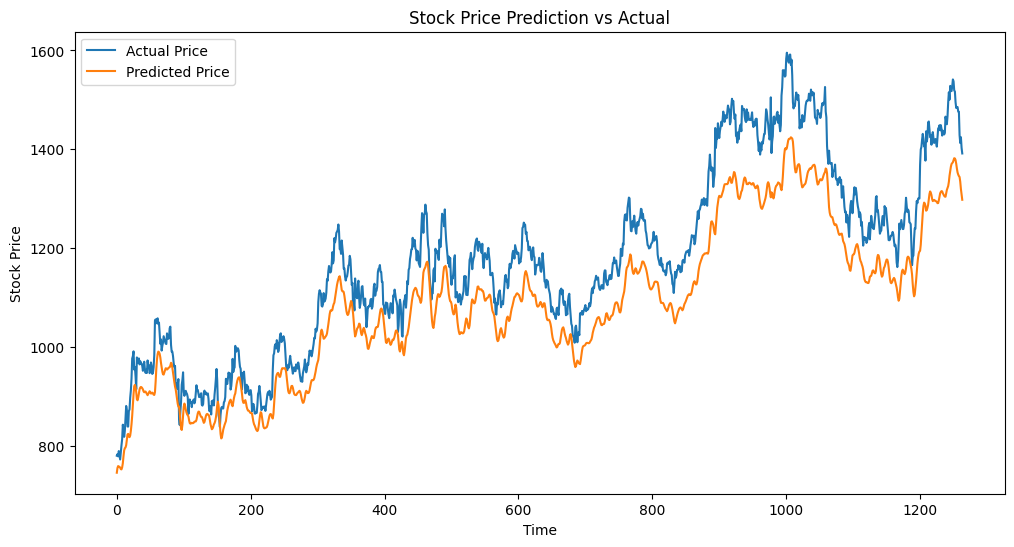

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title("Stock Price Prediction vs Actual")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()
